In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [2]:
import quandl
import pandas as pd
quandl.ApiConfig.api_key = 'YOUR KEY HERE'
def get_data(code_list):
    all_data=[]
    for each_code in code_list: 
        ary=quandl.get(f'ZILLOW/{each_code}', returns='numpy')
#         all_data[each_code]=ary
        one_df=pd.DataFrame(ary)
        one_df=one_df.rename({'Value': each_code}, axis=1)#, columns=['Date', each_code])
        one_df=one_df.set_index('Date')
        all_data.append(one_df)
    df=pd.concat(all_data, axis=1)
    return df

#Age of Inventory: Each Wednesday, age of inventory is calculated as the 
#median number of days all active listings as of that Wedne

df = get_data(['M9_MRP3B', 'M9_MRPAH'])
df = df.rename(columns={"M9_MRP3B": "Median Rent Price- 3BR", 
                        "M9_MRPAH": "Median Rent Price"})

drop_na_df = df.dropna()
drop_na_df.head()

,Median Rent Price- 3BR,Median Rent Price
Date,,
2010-02-28,1000.0,1150.0
2010-03-31,1050.0,1195.0
2010-04-30,1100.0,1200.0
2010-05-31,1100.0,1200.0
2010-06-30,1100.0,1200.0


The r-squared is: 0.9623828220461137


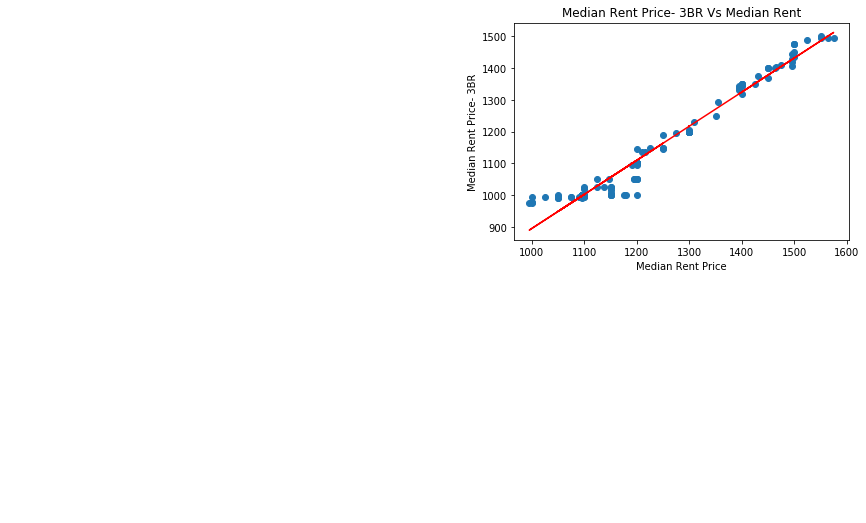

In [3]:
x_values = drop_na_df['Median Rent Price']
y_values = drop_na_df['Median Rent Price- 3BR']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.1,.1), fontsize=15,color="red")
plt.title('Median Rent Price- 3BR Vs Median Rent')
plt.xlabel('Median Rent Price')
plt.ylabel('Median Rent Price- 3BR')
print(f"The r-squared is: {rvalue**2}")
plt.show()


# The Median Rent Price and 3BR Median Rent Price had the strongest correlation with a R-squared value of 0.9623828.